In [50]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import flash_PBeta
import flash_TBeta


In [51]:
reload(flash_PBeta)
reload(flash_TBeta)

from flash_PBeta import flash_PBeta
from flash_TBeta import flash_TBeta

from m_vEoS import c_vEoS


Ncomp = 2

Tc = np.array([304.1,  190.555]) #K
Pc = np.array([73.8e5,  45.95e5]) #Pa
w = np.array([0.239,  0.008]) #dimensionless

kij = np.array([[0,0.0919],
                [0.0919,0],]) #dimensionless

#load_flash_PBeta(Tc,Pc,w,kij,Ncomp)
eos = c_vEoS(Ncomp,Tc,Pc,w,kij)


In [3]:
z = np.array([0.25, 0.75])

P_guess = 1e5
#P_grid = np.linspace(5e5,90e5,500)
P_grid2 = np.zeros(10000)
iterations2 = np.zeros(10000)
BETA = 0.
T_guess = 100

P_grid2[0] = 1e5
P_grid2[1] = 1.5e5

delta_T = 2
delta_P = 1e5

x2 = np.zeros([10000,2])
y2 = np.zeros([10000,2])
T2 = np.zeros(10000)

K = np.exp(np.log(Pc/P_guess)+5.373*(1.+w)*(1.-Tc/T_guess))

ans = flash_PBeta(T_guess,P_grid2[0],z,BETA,K,Ncomp,eos)
x2[0,:] = ans[0]
y2[0,:] = ans[1] 
K_old_old = ans[2]
T2[0] = ans[3]
iterations2[0] = ans[4]

T_guess = T2[0]

ans = flash_PBeta(T_guess,P_grid2[1],z,BETA,K_old_old,Ncomp,eos)
x2[1,:] = ans[0]
y2[1,:] = ans[1] 
K_old = ans[2]
T2[1] = ans[3]
iterations2[1] = ans[4]

T_guess = T2[1]

0.991739102445 1
6.74619939873e-08 2
1.56871281218e-11 3
0.00183180485722 1
1.04151686691e-07 2
8.84871544853e-12 3


In [4]:
i = 0

while max(abs(np.log(K)))>=0.07:

    dP_dT = (P_grid2[i+1] - P_grid2[i])/(T2[i+1]-T2[i])
    if dP_dT >= 1e5:
        print('estou aqui')
        P_grid2[i+2] = P_grid2[i+1] + (P_grid2[i+1] - P_grid2[i])*(delta_T*(9/(i+1)/(T2[i+1]-T2[i])))
        K = K_old + (K_old - K_old_old)*delta_T*(9/(i+1))/(T2[i+1]-T2[i])
        ans = flash_PBeta(T2[i+1],P_grid2[i+2],z,BETA,K,Ncomp,eos)
        x2[i+2,:] = ans[0]
        y2[i+2,:] = ans[1]
        K_old_old = K_old 
        K_old = ans[2]
        T2[i+2] = ans[3]
        iterations2[i+2] = ans[4]
    else:
        T2[i+2] = T2[i+1] + (T2[i+1] - T2[i])*(delta_P/(P_grid2[i+1]-P_grid2[i]))
        K = K_old + (K_old - K_old_old)*delta_P*(9/(i+1))/(P_grid2[i+1]-P_grid2[i])
        ans = flash_TBeta(T2[i+2],P_grid2[i+1],z,BETA,K,Ncomp,eos)
        x2[i+2,:] = ans[0]
        y2[i+2,:] = ans[1]
        K_old_old = K_old 
        K_old = ans[2]
        P_grid2[i+2] = ans[3]
        iterations2[i+2] = ans[4]

    print(i,P_grid2[i+2],T2[i+2],np.log(K_old),iterations2[i+2])
    i+=1

                 #0,1,2 => 0:3
#trimmed=original[0:final+1,inicio:final+1].copy()


0 302982.647367 128.281782655 [-4.55340888  0.28504579] 3.0
1 450384.008567 135.401462549 [-4.07897801  0.28344191] 3.0
2 575737.869936 140.231594263 [-3.78307482  0.28197768] 3.0
3 692002.468656 144.084791652 [-3.56011168  0.28054777] 3.0
4 804365.709503 147.398953858 [-3.37670543  0.27910545] 3.0
5 914497.733428 150.348461349 [-3.21943024  0.27763734] 3.0
6 1023121.90226 153.026617425 [-3.08110595  0.27613859] 3.0
7 1130640.63388 155.49214246 [-2.95726676  0.27460678] 3.0
8 1237308.4244 157.785254551 [-2.84489938  0.27304037] 3.0
9 1343298.38487 159.935024486 [-2.74185896  0.27143825] 4.0
10 1448734.24478 161.963301434 [-2.64655763  0.26979942] 4.0
11 1553707.76834 163.887008368 [-2.55778325  0.26812296] 4.0
12 1658289.01157 165.719572302 [-2.47458739  0.26640794] 4.0
13 1762532.72227 167.471859689 [-2.39621256  0.26465339] 4.0
14 1866482.51768 169.15281231 [-2.32204329  0.26285825] 4.0
15 1970173.71295 170.769893532 [-2.2515719   0.26102139] 4.0
16 2073635.29524 172.329409956 [-2.18

In [5]:
P_grid2 = P_grid2[0:i+2].copy()
T2 = T2[0:i+2].copy()
x2 = x2[0:i+2,:].copy()
y2 = y2[0:i+2,:].copy()

print(P_grid2,T2,x2,y2)

[  100000.           150000.           302982.64736664   450384.0085674
   575737.86993641   692002.46865647   804365.70950258   914497.73342785
  1023121.90225614  1130640.63387917  1237308.42439539  1343298.38486791
  1448734.24477986  1553707.76834226  1658289.01157268  1762532.72227353
  1866482.517676    1970173.7129514   2073635.29524479  2176891.33711401
  2279962.03099511  2382864.46078     2485613.18687146  2588220.69622338
  2690697.75288197  2793053.67399893  2895296.54917119  2997433.41607197
  3099470.40190494  3201412.83777523  3303265.35129539  3405031.94143797
  3506716.03867385  3608320.55268017  3709847.90932541  3811300.07815479
  3912678.59122802  4013984.55379441  4115218.64698914  4162628.97320439
  4209221.86917721  4254887.52488778  4299661.44291668  4343576.59779224
  4386663.99822627  4428952.84250307  4470470.65934314  4511243.43509097
  4551295.72880909  4590650.77664549  4629330.58666356  4667356.02517338
  4704746.89546816  4741522.00976576  4777699.255050

In [74]:
BETA = 1.0
delta_P = 0.1e3
delta_T = 0.01
T = np.zeros(10000)
P_grid = np.zeros(10000)
iterations = np.zeros(10000)

x = np.zeros([10000,2])
y = np.zeros([10000,2])

K = np.exp([-0.0003942,   0.00013136])

dP_dT = (P_grid2[len(P_grid2)-1] - P_grid2[len(P_grid2)-2])/(T2[len(T2)-1]-T2[len(T2)-2])

if dP_dT >= 1e4:
    P_grid[0] = P_grid2[len(P_grid2)-1] + (P_grid2[len(P_grid2)-1] - P_grid2[len(P_grid2)-2])*(delta_T*(9/(i+1)/(T2[len(T2)-1]-T2[len(T2)-2])))
    ans = flash_PBeta(T2[len(T2)-1],P_grid[0],z,BETA,K,Ncomp,eos)
    x[0,:] = ans[0]
    y[0,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T[0] = ans[3]
    iterations[0] = ans[4]
else:
    T[0] = T2[len(T2)-1] + (T2[len(T2)-1] - T2[len(T2)-2])*(delta_P/(P_grid2[len(P_grid2)-1]-P_grid2[len(P_grid2)-2]))
    ans = flash_TBeta(T[0],P_grid2[len(P_grid2)-1],z,BETA,K,Ncomp,eos)
    x[0,:] = ans[0]
    y[0,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    P_grid[0] = ans[3]
    iterations[0] = ans[4]

print(T[0],P_grid[0],K_old,np.log(K_old))

7.54419661234e-08 1
9.94661263752e-09 2
9.7994603898e-09 3
9.78345727023e-09 4
9.80641791068e-09 5
9.81367055551e-09 6
9.8245533676e-09 7
9.80376958459e-09 8
9.79528877932e-09 9
9.79170495462e-09 10
9.80635724498e-09 11
9.8079749301e-09 12
9.79735055259e-09 13
9.83644779099e-09 14
9.80575439777e-09 15
9.77628628869e-09 16
9.81863954351e-09 17
9.81426908308e-09 18
9.83498970612e-09 19
9.78790978152e-09 20
9.80261406259e-09 21
9.82762998121e-09 22
9.84181139821e-09 23
9.81604914673e-09 24
9.80186924047e-09 25
9.80701176896e-09 26
9.78998261097e-09 27
9.83603934063e-09 28
9.83898682674e-09 29
9.79651532568e-09 30
9.79289439057e-09 31
9.81156812952e-09 32
9.82623007152e-09 33
9.82432688482e-09 34
9.84867427004e-09 35
9.84070467758e-09 36
9.80292140318e-09 37
9.82032583277e-09 38
9.83381062973e-09 39
9.81260006929e-09 40
9.84443170814e-09 41
9.79087941925e-09 42
9.817939204e-09 43
9.8152186585e-09 44
9.83058533194e-09 45
9.8362898403e-09 46
9.83988303728e-09 47
9.82122664409e-09 48
9.819681

In [75]:
dP_dT = (P_grid[0] - P_grid2[len(P_grid2)-1])/(T[0]-T2[len(T2)-1])

if dP_dT >= 1e4:
    P_grid[1] = P_grid[0] + (P_grid[0] - P_grid2[len(P_grid2)-1])*(delta_T/(T[0]-T2[len(T2)-1]))
    K = K_old# + (K_old - K_old_old)*delta_T/(T[0]-T2[len(T2)-1])    
    ans = flash_PBeta(T[0],P_grid[1],z,BETA,K,Ncomp,eos)
    x[1,:] = ans[0]
    y[1,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T[1] = ans[3]
    iterations[1] = ans[4]
else:
    print('2B')
    T[1] = T[0] + (T[0] - T2[len(T2)-1])*(delta_P/(P_grid[0]-P_grid2[len(P_grid2)-1]))
    K = K_old #+ (K_old - K_old_old)*delta_P/(P_grid[0]-P_grid2[len(P_grid2)-1])
    ans = flash_TBeta(T[1],P_grid[0],z,BETA,K,Ncomp,eos)
    x[1,:] = ans[0]
    y[1,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    P_grid[1] = ans[3]
    iterations[1] = ans[4]

print(T[1],P_grid[1],K_old,np.log(K_old))

2B
222.18845252 6754718.09391 [ 0.96202929  1.01333186] [-0.03871038  0.01324378]


In [76]:
k=0

delta_P = 1e3
delta_T = 0.05
while P_grid[k+1]>=5e5:
    dP_dT = (P_grid[k+1] - P_grid[k])/(T[k+1]-T[k])
#    print(dP_dT)
    if abs(dP_dT) >= 8e4:
        print('estou aqui')
        
        P_grid[k+2] = P_grid[k+1] + delta_P# (P_grid[k+1] - P_grid[k])*(delta_T/(T[k+1]-T[k]))
        
        T[k+2] = T[k+1] + (T[k+1] - T[k])*(delta_P/(P_grid[k+1]-P_grid[k]))

#        print(dP_dT,P_grid[k+2],P_grid[k+1],P_grid[k],T[k+1])
#        print(K)
        K = K_old + (K_old - K_old_old)*delta_T/(T[k+1]-T[k])
        print(T[k+1],K,K_old)
        ans = flash_PBeta(T[k+2],P_grid2[k+2],z,BETA,K,Ncomp,eos)
        x[k+2,:] = ans[0]
        y[k+2,:] = ans[1]
        K_old_old = K_old 
        K_old = ans[2]
        T[k+2] = ans[3]
        iterations[k+2] = ans[4]
        print('calculei')
    else:
        T[k+2] = T[k+1] + delta_T# (T[k+1] - T[k])*(delta_P/(P_grid[k+1]-P_grid[k]))
        P_grid[k+2] = P_grid[k+1] + (P_grid[k+1] - P_grid[k])*(delta_T/(T[k+1]-T[k]))

#        print(T[k+2],T[k+1],T[k])
        K = K_old + (K_old - K_old_old)*delta_P/(P_grid[k+1]-P_grid[k])
        ans = flash_TBeta(T[k+2],P_grid[k+2],z,BETA,K,Ncomp,eos)
        x[k+2,:] = ans[0]
        y[k+2,:] = ans[1]
        K_old_old = K_old 
        K_old = ans[2]
        P_grid[k+2] = ans[3]
        iterations[k+2] = ans[4]

    print(k,P_grid[k+2],T[k+2],np.log(K_old),iterations[k+2])
    k+=1

0 6758349.50567 222.23845252 [-0.0421764   0.01446358] 6841.0
1 6761959.51666 222.28845252 [-0.04565226  0.01569261] 5968.0
2 6765547.89502 222.33845252 [-0.04913789  0.01693091] 5255.0
3 6769114.40585 222.38845252 [-0.05263333  0.0181786 ] 4671.0
4 6772658.81118 222.43845252 [-0.05613867  0.01943577] 4182.0
5 6776180.86991 222.48845252 [-0.05965396  0.02070255] 3770.0
6 6779680.33772 222.53845252 [-0.06317928  0.02197905] 3419.0
7 6783156.96709 222.58845252 [-0.0667147   0.02326537] 3118.0
8 6786610.50714 222.63845252 [-0.07026027  0.02456164] 2857.0
9 6790040.70361 222.68845252 [-0.07381607  0.02586797] 2630.0
10 6793447.29882 222.73845252 [-0.07738217  0.02718448] 2430.0
11 6796830.03155 222.78845252 [-0.08095863  0.02851129] 2254.0
12 6800188.637 222.83845252 [-0.08454552  0.02984853] 2098.0
13 6803522.84674 222.88845252 [-0.08814292  0.03119632] 1958.0
14 6806832.38859 222.93845252 [-0.09175089  0.03255478] 1833.0
15 6810116.98658 222.98845252 [-0.09536949  0.03392405] 1721.0
16 6

IndexError: index 132 is out of bounds for axis 0 with size 124

In [65]:
P_grid = P_grid[0:k+2].copy()
T = T[0:k+2].copy()
x = x[0:k+2,:].copy()
y = y[0:k+2,:].copy()

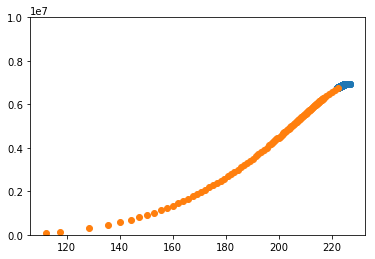

In [66]:
plt.scatter(T,P_grid)
plt.scatter(T2,P_grid2)

plt.ylim(0,1e7)
plt.show()

(988,)
(988,)


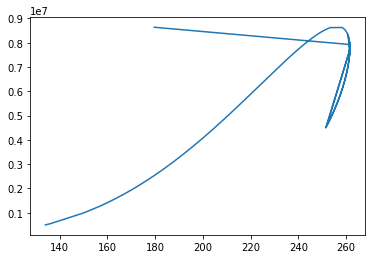

In [208]:
tall=np.concatenate(np.array([T2,T]),0)
print(tall.shape)
pau=np.concatenate(np.array([P_grid2,P_grid]),0)
print(pau.shape)
plt.plot(tall,pau)
plt.show()

In [ ]:
#